In [1]:
%matplotlib inline

In [2]:
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

from data import get_data_loader
from model import Net
from train import train, eval
from resnet import ResNet18

In [3]:
Net = ResNet18

In [4]:
trainloader, testloader, classes = get_data_loader()

Files already downloaded and verified
Files already downloaded and verified


plane   dog  deer  deer truck   cat truck truck   cat   cat plane horse plane   dog   dog  deer   car   car  frog   car  frog   dog  ship   cat   car  frog  deer  bird  deer  bird   cat horse   car   cat   cat  ship horse plane plane plane truck plane  frog horse  ship  deer  bird plane   cat   dog  bird truck   dog   cat  deer   dog   dog  frog horse  frog  ship  deer plane truck


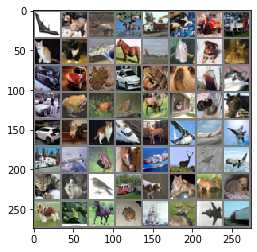

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(len(images))))

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = Net().to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,train_losses, train_acc)
    eval(model, device, testloader, test_losses, test_acc)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.6086850166320801 Batch_id=781 Accuracy=53.28: 100%|██████████| 782/782 [00:34<00:00, 22.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1081, Accuracy: 6172/10000 (61.72%)

EPOCH: 1


Loss=0.7736624479293823 Batch_id=781 Accuracy=73.67: 100%|██████████| 782/782 [00:35<00:00, 22.25it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6663, Accuracy: 7720/10000 (77.20%)

EPOCH: 2


Loss=0.6498692035675049 Batch_id=781 Accuracy=81.32: 100%|██████████| 782/782 [00:36<00:00, 21.56it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7267, Accuracy: 7611/10000 (76.11%)

EPOCH: 3


Loss=0.43893083930015564 Batch_id=781 Accuracy=86.14: 100%|██████████| 782/782 [00:37<00:00, 21.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5902, Accuracy: 8097/10000 (80.97%)

EPOCH: 4


Loss=0.3350684344768524 Batch_id=781 Accuracy=89.92: 100%|██████████| 782/782 [00:37<00:00, 21.13it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6692, Accuracy: 7977/10000 (79.77%)

EPOCH: 5


Loss=0.3745824098587036 Batch_id=781 Accuracy=92.84: 100%|██████████| 782/782 [00:36<00:00, 21.15it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6842, Accuracy: 7998/10000 (79.98%)

EPOCH: 6


Loss=0.09511005878448486 Batch_id=781 Accuracy=95.17: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6967, Accuracy: 8155/10000 (81.55%)

EPOCH: 7


Loss=0.03623369336128235 Batch_id=781 Accuracy=96.58: 100%|██████████| 782/782 [00:37<00:00, 21.12it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7976, Accuracy: 8080/10000 (80.80%)

EPOCH: 8


Loss=0.10346224904060364 Batch_id=781 Accuracy=97.72: 100%|██████████| 782/782 [00:37<00:00, 21.09it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7625, Accuracy: 8122/10000 (81.22%)

EPOCH: 9


Loss=0.08590894937515259 Batch_id=781 Accuracy=97.94: 100%|██████████| 782/782 [00:37<00:00, 21.07it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8133, Accuracy: 8206/10000 (82.06%)

EPOCH: 10


Loss=0.07735121250152588 Batch_id=781 Accuracy=98.45: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8470, Accuracy: 8265/10000 (82.65%)

EPOCH: 11


Loss=0.018872201442718506 Batch_id=781 Accuracy=98.95: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8808, Accuracy: 8268/10000 (82.68%)

EPOCH: 12


Loss=0.0024257302284240723 Batch_id=781 Accuracy=99.06: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8183, Accuracy: 8353/10000 (83.53%)

EPOCH: 13


Loss=0.0005947351455688477 Batch_id=781 Accuracy=99.40: 100%|██████████| 782/782 [00:37<00:00, 21.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8345, Accuracy: 8350/10000 (83.50%)

EPOCH: 14


Loss=0.0005308389663696289 Batch_id=781 Accuracy=99.65: 100%|██████████| 782/782 [00:37<00:00, 21.07it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8371, Accuracy: 8400/10000 (84.00%)

EPOCH: 15


Loss=0.024829983711242676 Batch_id=781 Accuracy=99.78: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8277, Accuracy: 8428/10000 (84.28%)

EPOCH: 16


Loss=0.0076045989990234375 Batch_id=781 Accuracy=99.88: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8336, Accuracy: 8427/10000 (84.27%)

EPOCH: 17


Loss=0.26163190603256226 Batch_id=781 Accuracy=99.91: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8363, Accuracy: 8494/10000 (84.94%)

EPOCH: 18


Loss=0.08151084184646606 Batch_id=781 Accuracy=99.16: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9391, Accuracy: 8305/10000 (83.05%)

EPOCH: 19


Loss=0.015848219394683838 Batch_id=781 Accuracy=99.38: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9240, Accuracy: 8258/10000 (82.58%)

EPOCH: 20


Loss=0.4535393714904785 Batch_id=781 Accuracy=99.37: 100%|██████████| 782/782 [00:37<00:00, 21.05it/s]    
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9142, Accuracy: 8337/10000 (83.37%)

EPOCH: 21


Loss=0.004454523324966431 Batch_id=781 Accuracy=99.20: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8679, Accuracy: 8368/10000 (83.68%)

EPOCH: 22


Loss=0.00044840574264526367 Batch_id=781 Accuracy=99.70: 100%|██████████| 782/782 [00:37<00:00, 21.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9069, Accuracy: 8386/10000 (83.86%)

EPOCH: 23


Loss=0.013147801160812378 Batch_id=781 Accuracy=99.79: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8515, Accuracy: 8449/10000 (84.49%)

EPOCH: 24


Loss=0.025750815868377686 Batch_id=781 Accuracy=99.93: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8249, Accuracy: 8508/10000 (85.08%)

EPOCH: 25


Loss=0.00021857023239135742 Batch_id=781 Accuracy=99.98: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8263, Accuracy: 8510/10000 (85.10%)

EPOCH: 26


Loss=0.0025162696838378906 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8258, Accuracy: 8537/10000 (85.37%)

EPOCH: 27


Loss=0.0027469396591186523 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8288, Accuracy: 8531/10000 (85.31%)

EPOCH: 28


Loss=9.888410568237305e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8278, Accuracy: 8569/10000 (85.69%)

EPOCH: 29


Loss=0.09201169013977051 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.00it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8188, Accuracy: 8552/10000 (85.52%)

EPOCH: 30


Loss=0.0007883310317993164 Batch_id=781 Accuracy=99.94: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9001, Accuracy: 8468/10000 (84.68%)

EPOCH: 31


Loss=0.008877336978912354 Batch_id=781 Accuracy=99.98: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8604, Accuracy: 8518/10000 (85.18%)

EPOCH: 32


Loss=0.000659942626953125 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 20.99it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8613, Accuracy: 8530/10000 (85.30%)

EPOCH: 33


Loss=0.00046449899673461914 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8441, Accuracy: 8562/10000 (85.62%)

EPOCH: 34


Loss=0.0018070340156555176 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8619, Accuracy: 8570/10000 (85.70%)

EPOCH: 35


Loss=0.0003681182861328125 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8597, Accuracy: 8559/10000 (85.59%)

EPOCH: 36


Loss=0.00013303756713867188 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8663, Accuracy: 8582/10000 (85.82%)

EPOCH: 37


Loss=0.0002575516700744629 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 20.98it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8549, Accuracy: 8566/10000 (85.66%)

EPOCH: 38


Loss=3.826618194580078e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 21.00it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8572, Accuracy: 8573/10000 (85.73%)

EPOCH: 39


Loss=0.011220932006835938 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:37<00:00, 20.98it/s]  



Test set: Average loss: 0.8685, Accuracy: 8553/10000 (85.53%)



Text(0.5, 1.0, 'Test Accuracy')

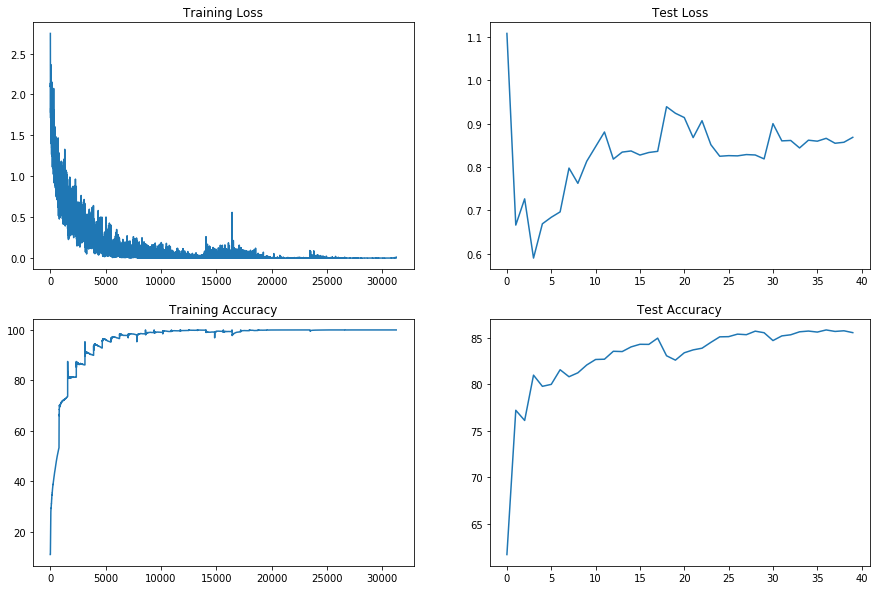

In [8]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


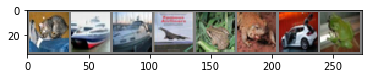

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [10]:
outputs = model(images.to(device))

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:    cat  ship  ship plane  frog  frog   car  deer


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 86 %
Accuracy of   car : 93 %
Accuracy of  bird : 77 %
Accuracy of   cat : 73 %
Accuracy of  deer : 80 %
Accuracy of   dog : 77 %
Accuracy of  frog : 89 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 92 %
